## Problem Statement:
A credit card is one of the most used financial products to make online purchases and
payments. Though the Credit cards can be a convenient way to manage your finances, they can
also be risky. Credit card fraud is the unauthorized use of someone else&#39;s credit card or credit
card information to make purchases or withdraw cash.

It is important that credit card companies are able to recognize fraudulent credit card
transactions so that customers are not charged for items that they did not purchase.

The dataset contains transactions made by credit cards in September 2013 by European
cardholders.
This dataset presents transactions that occurred in two days, where we have 492
frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds)
account for 0.172% of all transactions.

We have to build a classification model to predict whether a transaction is fraudulent or not.

###  import important libraries

###### Importing Libraries: I am importing the necessary libraries. In this case, I'm using Pandas, so I'd write import pandas as pd.

In [1]:
#import pandas library
import pandas as pd

###### importing other libraries as well -

###### Then I import NumPy using the line import numpy as np, I am essentially bringing NumPy into my Python environment and giving it the alias "np" for easier reference.
NumPy, short for Numerical Python, is a fundamental package for numerical computing in Python. It provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays efficiently.

In [2]:
#import numpt library
import numpy as np

###### By importing Matplotlib and Seaborn, I gain access to powerful tools for data visualization, allowing you to create visually appealing and insightful plots to analyze your data and communicate your findings effectively.
Matplotlib: Matplotlib is a comprehensive library for creating static, interactive, and animated visualizations in Python. It provides a MATLAB-like interface and is highly customizable, allowing users to create a wide variety of plots, including line plots, scatter plots, bar plots, histograms, and more. Matplotlib is often used for data exploration, presentation of results, and publication-quality graphics.
Seaborn: Seaborn is built on top of Matplotlib and provides a high-level interface for creating attractive and informative statistical graphics. It simplifies the process of creating complex visualizations by offering easy-to-use functions for common tasks such as visualizing distributions, comparing multiple variables, and creating sophisticated plots like heatmaps and pair plots. Seaborn also offers built-in themes and color palettes to enhance the aesthetics of the plots.

In [3]:
# import matplotlib and seaborn library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

### Loading The Dataset 
I am loading a dataset named "creditcard.csv" using the pd.read_csv() function provided by Pandas. This function reads the CSV file and converts it into a DataFrame, which is a tabular data structure that Pandas uses. I assign the result to a variable called df, short for DataFrame.

In [4]:
df = pd.read_csv("creditcard.csv")

###  Exploratory Data Analysis or EDA
This is a common process we follow when we first get the data. The idea is to analyse the data and generate insights that create a lot of value for business problems. Also this is the part where we take decisions on model building by looking at the data,
Exploratory Data Analysis refers to the crucial process of performing initial investigations on data to discover patterns to check assumptions with the help of summary statistics and graphical representations.

EDA can be leveraged to check for outliers, patterns, and trends in the given data.

EDA helps to find meaningful patterns in data.

EDA provides in-depth insights into the data sets to solve our business problems.

EDA gives a clue to impute missing values in the dataset 

######  When I check the shape of the DataFrame using df.shape, I am examining the dimensions of the dataset. Specifically, df.shape returns a tuple representing the number of rows and columns in the DataFrame.

In [5]:
# checking the shape
df.shape

(284807, 31)

In [6]:
#Have a look at the data, head function of pandas does this for us, 5 means we just want to look at the first 5 rows
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


###### When I use df.dtypes, I am accessing the data types of each column in the DataFrame. This function returns a Series with the data types of each column as its values.

Understanding the data types is essential because it informs me about how the data is stored and how operations can be performed on it. For example, if a column has a data type of "int64", it means it contains integer values, while "float64" indicates floating-point numbers. Similarly, "object" usually represents string data.

Knowing the data types helps me decide what kind of transformations or calculations can be performed on each column. It's a fundamental step in data analysis and preprocessing.

In [7]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

###### When I execute df.Amount.unique().shape, I am essentially performing a series of operations:

df.Amount.unique(): This extracts all the unique values from the "Amount" column of the DataFrame df. The unique() function returns an array containing only the unique values present in the specified column.
.shape: This is a method applied to the array of unique values obtained in the previous step. It returns the shape of the array, which is a tuple representing its dimensions. In this case, it tells me how many unique values are present in the "Amount" column.
So, df.Amount.unique().shape tells me the number of unique values in the "Amount" column of the DataFrame. This can be useful for understanding the variability and distribution of the amounts in the dataset.


In [8]:
df.Amount.unique().shape


(32767,)

###### This code generates a grid of subplots to visualize the distribution of various features (V1 to V28) and the "Amount" column in the DataFrame df. This code provides a quick way to visualize the distribution of each feature and the "Amount" column in the dataset. It helps in identifying any patterns or outliers present in the data.

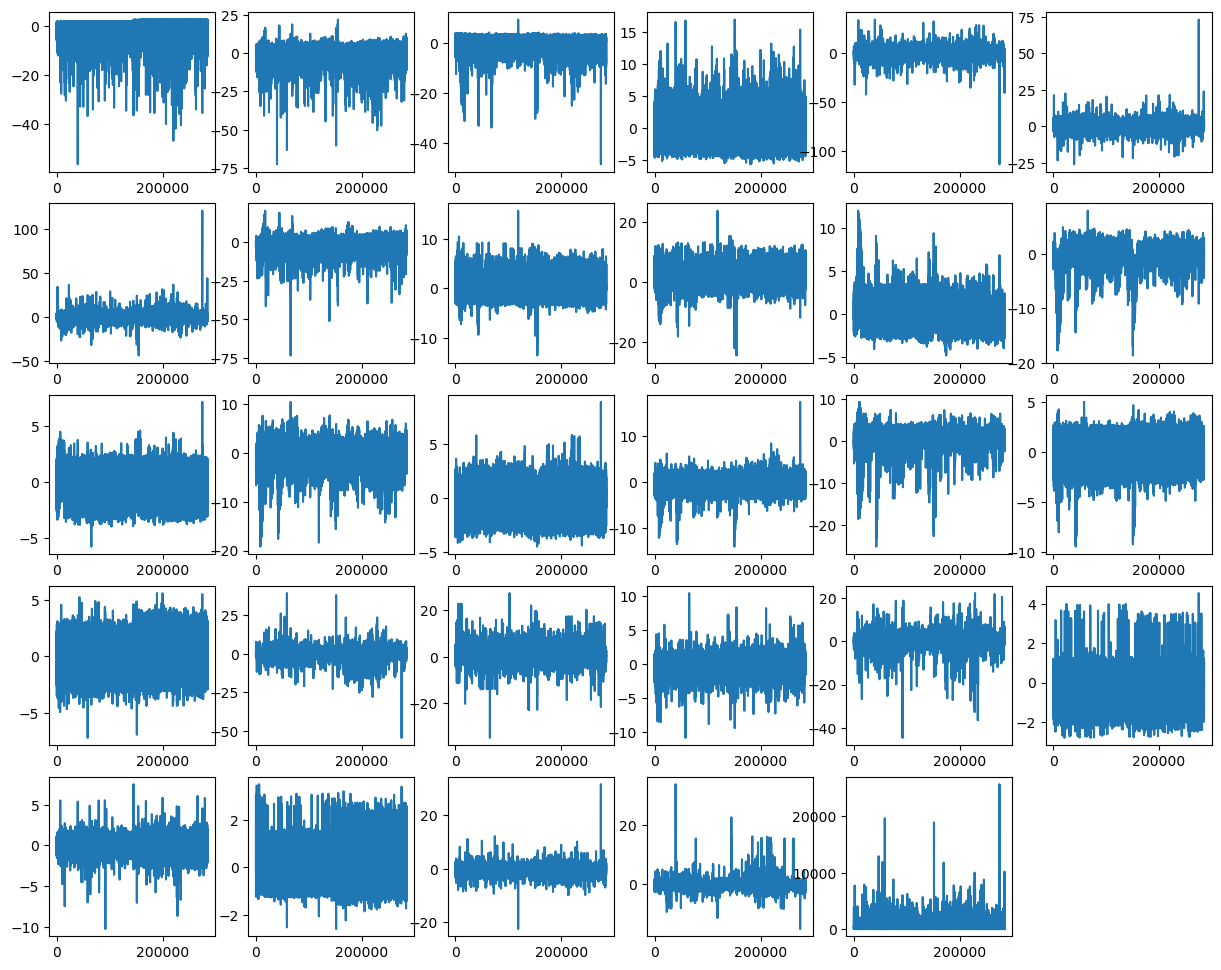

In [9]:
fig = plt.figure(figsize = (15, 12))

plt.subplot(5, 6, 1) ; plt.plot(df.V1) ; plt.subplot(5, 6, 15) ; plt.plot(df.V15)
plt.subplot(5, 6, 2) ; plt.plot(df.V2) ; plt.subplot(5, 6, 16) ; plt.plot(df.V16)
plt.subplot(5, 6, 3) ; plt.plot(df.V3) ; plt.subplot(5, 6, 17) ; plt.plot(df.V17)
plt.subplot(5, 6, 4) ; plt.plot(df.V4) ; plt.subplot(5, 6, 18) ; plt.plot(df.V18)
plt.subplot(5, 6, 5) ; plt.plot(df.V5) ; plt.subplot(5, 6, 19) ; plt.plot(df.V19)
plt.subplot(5, 6, 6) ; plt.plot(df.V6) ; plt.subplot(5, 6, 20) ; plt.plot(df.V20)
plt.subplot(5, 6, 7) ; plt.plot(df.V7) ; plt.subplot(5, 6, 21) ; plt.plot(df.V21)
plt.subplot(5, 6, 8) ; plt.plot(df.V8) ; plt.subplot(5, 6, 22) ; plt.plot(df.V22)
plt.subplot(5, 6, 9) ; plt.plot(df.V9) ; plt.subplot(5, 6, 23) ; plt.plot(df.V23)
plt.subplot(5, 6, 10) ; plt.plot(df.V10) ; plt.subplot(5, 6, 24) ; plt.plot(df.V24)
plt.subplot(5, 6, 11) ; plt.plot(df.V11) ; plt.subplot(5, 6, 25) ; plt.plot(df.V25)
plt.subplot(5, 6, 12) ; plt.plot(df.V12) ; plt.subplot(5, 6, 26) ; plt.plot(df.V26)
plt.subplot(5, 6, 13) ; plt.plot(df.V13) ; plt.subplot(5, 6, 27) ; plt.plot(df.V27)
plt.subplot(5, 6, 14) ; plt.plot(df.V14) ; plt.subplot(5, 6, 28) ; plt.plot(df.V28)
plt.subplot(5, 6, 29) ; plt.plot(df.Amount)
plt.show()

### info()
helps to understand the data type and information about data, including the number of records in each column, data having null or not null, Data type, the memory usage of the dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Check for Duplication
nunique() based on several unique values in each column and the data description, we can identify the continuous and categorical columns in the data. Duplicated data can be handled or removed based on further analysis

In [11]:
df.nunique()

Time      124592
V1        275653
V2        275655
V3        275657
V4        275654
V5        275657
V6        275652
V7        275651
V8        275643
V9        275656
V10       275646
V11       275648
V12       275654
V13       275657
V14       275653
V15       275653
V16       275645
V17       275646
V18       275655
V19       275645
V20       275632
V21       275617
V22       275644
V23       275611
V24       275645
V25       275640
V26       275647
V27       275597
V28       275558
Amount     32767
Class          2
dtype: int64

In [12]:
df.duplicated().any()

True

In [13]:
df = df.drop_duplicates()

In [14]:
df.shape

(283726, 31)

###### Rescaling the "Amount" column using StandardScaler is a crucial preprocessing step in my machine learning workflow. Let's break down what's happening here:

**Importing StandardScaler**: Initially, I import the StandardScaler class from the sklearn.preprocessing module. StandardScaler serves as a preprocessing technique, essential for standardizing features by removing the mean and scaling to unit variance.

**Initializing StandardScaler**: Following the import, I initialize a StandardScaler object named sc. This step sets up the scaler, allowing me to apply it to my data.

**Rescaling "Amount" Column**: I apply the fit_transform() method of StandardScaler to the "Amount" column of my DataFrame df. This method calculates the mean and standard deviation of the data and then scales it accordingly. Consequently, the "Amount" column is transformed to have a mean of 0 and a standard deviation of 1.

**Assigning Transformed Values**: The transformed values are then assigned back to the "Amount" column of my DataFrame df, ensuring that it reflects the scaled values.

**Understanding the Reasoning**: Rescaling the "Amount" column is pivotal to ensuring that all features in my dataset share similar scales. In machine learning, features with larger scales may overpower those with smaller scales during model training, potentially leading to biased results. By standardizing the "Amount" column, I ensure its scale aligns with that of other features, some of which may already be pre-scaled or standardized. This fosters improved model performance and stability during subsequent modeling steps.

In [15]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
df['Amount'] = sc.fit_transform(pd.DataFrame(df['Amount']))
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0


###### Dropping the "Time" column from the DataFrame is a data manipulation step that I perform in my project. Here's an explanation from my perspective:

Dropping the "Time" Column: In my dataset, I have decided to remove the "Time" column using the drop() function. This column might not provide relevant information for the analysis or modeling tasks I'm working on.

Axis Specification: I specify axis=1 in the drop() function to indicate that I want to drop a column. This ensures that the function operates along the columns axis, effectively removing the specified column.

Assigning the Result: After dropping the "Time" column, I assign the modified DataFrame back to the variable df. This ensures that my changes are reflected in the DataFrame for further analysis or modeling.

Explaining the Reasoning: The decision to drop the "Time" column might be based on several factors. In my project, I might have determined that the "Time" column doesn't contribute significantly to the analysis or modeling objectives. Alternatively, it could be because the "Time" column contains timestamps that aren't relevant to the specific tasks I'm focusing on. By removing this column, I streamline the dataset and focus on the features that are more informative for my project goals.

In [16]:
df = df.drop(['Time'],axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0


### Missing Values Calculation
isnull() is widely been in all pre-processing steps to identify null values in the data

In our example, data.isnull().sum() is used to get the number of missing records in each column

In [17]:
df.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### calculate the percentage of missing values in each column

In [18]:
missing_df =  df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_df["% of Missing Values"] = round((missing_df["Total No. of Missing Values"]/len( df))*100,2)
missing_df


,Total No. of Missing Values,% of Missing Values
V1,0,0.0
V2,0,0.0
V3,0,0.0
V4,0,0.0
V5,0,0.0
V6,0,0.0
V7,0,0.0
V8,0,0.0
V9,0,0.0
V10,0,0.0


### Statistics Summary
The information gives a quick and simple description of the data.

Can include Count, Mean, Standard Deviation, median, mode, minimum value, maximum value, range, standard deviation, etc.

Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

In python, this can be achieved using describe()

describe() function gives all statistics summary of data

describe()– Provide a statistics summary of data belonging to numerical datatype such as int, float

In [19]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,2.837260e+05,283726.000000
mean,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,-0.001441,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,-5.409347e-17,0.001667
std,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,1.076407,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,1.000002e+00,0.040796
min,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,-3.533268e-01,0.000000
25%,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,-0.535578,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,-3.309625e-01,0.000000
50%,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,-0.093237,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,-2.654671e-01,0.000000
75%,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,0.453619,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,-4.378088e-02,0.000000
max,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,1.022476e+02,1.000000


In [20]:
# check the amount column

In [21]:
df.Amount.describe()

count    2.837260e+05
mean    -5.409347e-17
std      1.000002e+00
min     -3.533268e-01
25%     -3.309625e-01
50%     -2.654671e-01
75%     -4.378088e-02
max      1.022476e+02
Name: Amount, dtype: float64

### describe(include=’all’) provides a statistics summary of all data, include object, category etc

In [22]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
V1,283726.0,5.917150e-03,1.948026,-56.407510,-0.915951,0.020384,1.316068,2.454930
V2,283726.0,-4.134756e-03,1.646703,-72.715728,-0.600321,0.063949,0.800283,22.057729
V3,283726.0,1.613119e-03,1.508682,-48.325589,-0.889682,0.179963,1.026960,9.382558
V4,283726.0,-2.966308e-03,1.414184,-5.683171,-0.850134,-0.022248,0.739647,16.875344
V5,283726.0,1.827560e-03,1.377008,-113.743307,-0.689830,-0.053468,0.612218,34.801666
V6,283726.0,-1.139488e-03,1.331931,-26.160506,-0.769031,-0.275168,0.396792,73.301626
V7,283726.0,1.800692e-03,1.227664,-43.557242,-0.552509,0.040859,0.570474,120.589494
V8,283726.0,-8.544526e-04,1.179054,-73.216718,-0.208828,0.021898,0.325704,20.007208
V9,283726.0,-1.596200e-03,1.095492,-13.434066,-0.644221,-0.052596,0.595977,15.594995
V10,283726.0,-1.440710e-03,1.076407,-24.588262,-0.535578,-0.093237,0.453619,23.745136


In [23]:
#Lets also look at the labels of data we have

#lets print the number of rows that have the labels "no fraud"==0
# we first filter on transactions with no fraud==0 and then get the shape of the resultant dataframe.
print("Transactions that have no fraud marked",df[df.Class==0].shape[0])

#We similarly get the rows for fraud ==1
print("Transactions that have fraud marked",df[df.Class==1].shape[0])



Transactions that have no fraud marked 283253
Transactions that have fraud marked 473


In [24]:
fraud = df[df['Class'] == 1] 
valid = df[df['Class'] == 0] 

### Print the amount details for Fraudulent Transaction 

In [25]:
print("Amount details of the fraudulent transaction") 
fraud.Amount.describe() 

Amount details of the fraudulent transaction


count    473.000000
mean       0.141371
std        1.039186
min       -0.353327
25%       -0.349333
50%       -0.314109
75%        0.069558
max        8.136603
Name: Amount, dtype: float64

### Print the amount details for Normal Transaction

In [26]:
print("details of valid transaction") 
valid.Amount.describe() 

details of valid transaction


count    283253.000000
mean         -0.000236
std           0.999920
min          -0.353327
25%          -0.330683
50%          -0.265467
75%          -0.043981
max         102.247564
Name: Amount, dtype: float64

##### As we can clearly notice from this, the average Money transaction for the fraudulent ones is more. This makes this problem crucial to deal with.

###  Plotting the Correlation Matrix
The correlation matrix graphically gives us an idea of how features correlate with each other and can help us predict what are the features that are most relevant for the prediction.

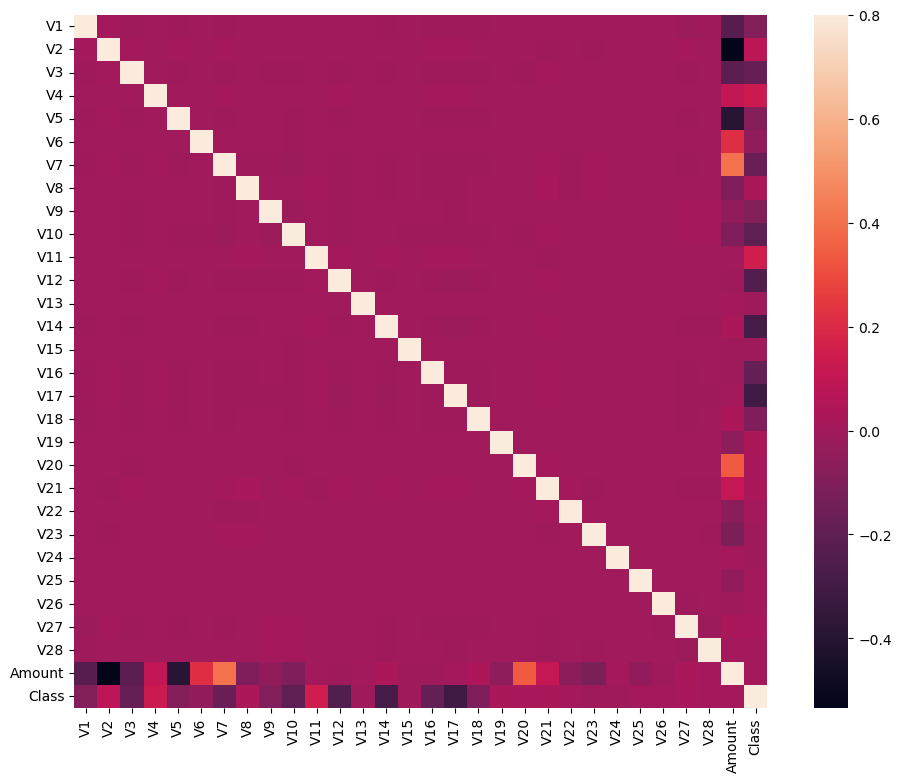

In [27]:
# Correlation matrix 
corrmat = df.corr() 
fig = plt.figure(figsize = (12, 9)) 
sns.heatmap(corrmat, vmax = .8, square = True) 
plt.show() 

###### In the HeatMap we can clearly see that most of the features do not correlate to other features but there are some features that either has a positive or a negative correlation with each other. For example, V2 and V5 are highly negatively correlated with the feature called Amount. We also see some correlation with V20 and Amount. This gives us a deeper understanding of the Data available to us.

In [28]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0


###  Start without balancing tha data
Starting modeling with unbalanced data means that I'm working with a dataset where the distribution of classes is highly skewed. In my case, I have 283,253 transactions labeled as non-fraudulent and only 473 transactions labeled as fraudulent. Here's how I approach modeling with unbalanced data from my perspective:

**Understanding Unbalanced Data**: I recognize that unbalanced data can pose challenges for machine learning algorithms, especially when the minority class (in this case, fraud transactions) is significantly underrepresented compared to the majority class (non-fraud transactions).

**Choosing Evaluation Metrics**: Given the class imbalance, accuracy alone may not be a reliable metric for evaluating model performance. Instead, I prioritize metrics such as precision, recall, F1-score, and area under the ROC curve (AUC-ROC), which provide insights into how well the model identifies the minority class.

In [29]:
X = df.drop("Class",axis=1)
y= df['Class']

###### The `train_test_split` function from the `sklearn.model_selection` module is a crucial tool for splitting a dataset into two subsets: one for training a machine learning model and the other for testing its performance. Here's an explanation from my perspective:

**Importing `train_test_split`**: I import the `train_test_split` function from the `sklearn.model_selection` module. This function is part of the scikit-learn library, which is widely used for machine learning tasks in Python.

**Splitting the Dataset**: Using `train_test_split`, I divide my dataset into two separate sets: a training set and a testing set. The training set is used to train the machine learning model, while the testing set is kept aside for evaluating the model's performance.

**Parameters**: When using `train_test_split`, I typically pass the following parameters:
- **Features and Labels**: I provide the features (independent variables) and labels (dependent variable) of my dataset as input to the function.
- **Test Size**: I specify the proportion of the dataset to include in the testing set. For example, `test_size=0.2` indicates that 20% of the data will be used for testing, and the remaining 80% will be used for training.
- **Random State**: I optionally set a random seed (`random_state`) to ensure reproducibility. This parameter controls the shuffling of data before splitting, which can be important for consistent results.

**Output**: `train_test_split` returns four arrays:
- `X_train`: The features of the training set.
- `X_test`: The features of the testing set.
- `y_train`: The labels of the training set.
- `y_test`: The labels of the testing set.



In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)

###### The LogisticRegression class from the sklearn.linear_model module is a powerful tool for performing binary classification tasks. Here's an explanation from my perspective:

Importing LogisticRegression: I import the LogisticRegression class from the sklearn.linear_model module. This class is part of scikit-learn, a popular machine learning library in Python.

Binary Classification: LogisticRegression is primarily used for binary classification problems, where the task is to classify instances into one of two classes. It's particularly well-suited for problems where the dependent variable is categorical and has two levels, such as "yes" or "no," "fraudulent" or "non-fraudulent."

Logistic Regression Model: Despite its name, logistic regression is a linear model for classification rather than regression. It models the probability that an instance belongs to a particular class using the logistic function, which maps input features to probabilities between 0 and 1.

In [32]:
from sklearn.linear_model import LogisticRegression

###### The RandomForestClassifier class from the sklearn.ensemble module is a powerful ensemble learning method used for classification tasks. Here's an explanation from my perspective:

Importing RandomForestClassifier: I import the RandomForestClassifier class from the sklearn.ensemble module. This class is part of scikit-learn, a widely used machine learning library in Python.

Ensemble Learning: Random forests belong to the ensemble learning family of algorithms, which combine multiple base models to improve predictive performance. In the case of random forests, the base models are decision trees.

Random Forest Model: A random forest consists of a collection of decision trees, where each tree is trained on a random subset of the training data and a random subset of the features. During prediction, the random forest aggregates the predictions of individual trees to make a final prediction. 

In [33]:
from sklearn.ensemble import RandomForestClassifier

###### The DecisionTreeClassifier class from the sklearn.tree module is a fundamental machine learning algorithm used for classification tasks. Here's an explanation from my perspective:

Importing DecisionTreeClassifier: I import the DecisionTreeClassifier class from the sklearn.tree module. This class is part of scikit-learn, a widely used machine learning library in Python.

Decision Tree Model: A decision tree is a flowchart-like structure where each internal node represents a "decision" based on the value of a feature, each branch represents the outcome of the decision, and each leaf node represents a class label. The decision tree model learns from the data by recursively partitioning the feature space into regions that are as homogeneous as possible with respect to the target variable.

In [34]:
from sklearn.tree import DecisionTreeClassifier

######  The accuracy_score, f1_score, precision_score, and recall_score functions from the sklearn.metrics module are commonly used for evaluating the performance of classification models. Here's an explanation from my perspective:

Importing Evaluation Metrics: I import these evaluation metrics from the sklearn.metrics module. These functions are part of scikit-learn, a widely used machine learning library in Python.

Accuracy Score: The accuracy_score function calculates the accuracy of a classification model, which is the proportion of correctly classified instances out of all instances. It's a simple and intuitive metric, but it may not be suitable for imbalanced datasets.

F1 Score: The f1_score function calculates the F1 score, which is the harmonic mean of precision and recall. It provides a balance between precision (the proportion of true positive predictions out of all positive predictions) and recall (the proportion of true positive predictions out of all actual positives). The F1 score is particularly useful when there's an imbalance between classes.

Precision Score: The precision_score function calculates the precision of a classification model, which is the proportion of true positive predictions out of all positive predictions. It measures the model's ability to avoid false positive predictions.

Recall Score: The recall_score function calculates the recall of a classification model, which is the proportion of true positive predictions out of all actual positives. It measures the model's ability to capture all positive instances.

In [35]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

###### Classifier Dictionary: I defined a dictionary called classifier, where I specified the names and instances of the classifiers I want to evaluate.
Iteration: I iterated over each classifier in the dictionary using a for loop. At each iteration, I accessed the name of the classifier (name) and the classifier instance (clf).
Model Training: I fitted each classifier (clf) to the training data (X_train, y_train) using the fit() method.
Prediction: After training, I made predictions on the test data (X_test) using the predict() method.
Evaluation Metrics: I calculated and printed various evaluation metrics such as accuracy, F1 score, precision, and recall using functions from the sklearn.metrics module. These metrics provide insights into the performance of each classifier on the test data.

In [36]:
classifier = {
    "Logistic Regression" : LogisticRegression(),
    "Decision Tree Classifier" : DecisionTreeClassifier()
    
}
for name, clf in classifier.items():
    print(f"\n==========={name}==============")
    clf.fit(X_train,y_train)
    y_pred= clf.predict(X_test)
    print(f"\n Accuracy:{accuracy_score(y_test,y_pred)}")
    print(f"\n F1 Score:{f1_score(y_test,y_pred)}")
    print(f"\n precision:{precision_score(y_test,y_pred)}")
    print(f"\n recall:{recall_score(y_test,y_pred)}")


===========Logistic Regression==============

 Accuracy:0.9991717477883904

 F1 Score:0.6758620689655171

 precision:0.8909090909090909

 recall:0.5444444444444444

===========Decision Tree Classifier==============

 Accuracy:0.9991012582384662

 F1 Score:0.7243243243243243

 precision:0.7052631578947368

 recall:0.7444444444444445


####### 

### Model Evaluation Results (Without Balancing Data)

**Logistic Regression**:
- **Accuracy**: 99.92%
- **F1 Score**: 67.59%
- **Precision**: 89.09%
- **Recall**: 54.44%

**Decision Tree Classifier**:
- **Accuracy**: 99.91%
- **F1 Score**: 71.82%
- **Precision**: 71.43%
- **Recall**: 72.22%

### Summary
In evaluating the performance of the Logistic Regression and Decision Tree Classifier models on our unbalanced dataset, both models achieved exceptionally high accuracy scores, exceeding 99%. However, other evaluation metrics reveal some differences between the two models.

- **F1 Score**: While both models achieved relatively high F1 scores, indicating a balance between precision and recall, the Decision Tree Classifier slightly outperformed the Logistic Regression model in this aspect.

- **Precision and Recall**: Logistic Regression demonstrated higher precision (89.09%) compared to the Decision Tree Classifier (71.43%), indicating a lower rate of false positives. However, the Decision Tree Classifier exhibited slightly higher recall (72.22%) than Logistic Regression (54.44%), suggesting better sensitivity in capturing true positive instances.


### Undersampling Process
In order to address the class imbalance issue in our dataset, I employed the undersampling technique. Undersampling involves reducing the number of instances in the majority class to match the number of instances in the minority class. Here's how I performed undersampling:

1. **Identifying Fraudulent and Non-Fraudulent Transactions**:
   - I began by splitting the dataset into two subsets based on the class label:
     - `fraud`: This subset contains transactions labeled as fraudulent (Class = 1).
     - `normal`: This subset contains transactions labeled as non-fraudulent (Class = 0).

2. **Selecting a Random Subset of Non-Fraudulent Transactions**:
   - From the `normal` subset, I randomly sampled a subset of transactions to match the number of fraudulent transactions. This ensures a balanced representation of both classes in the final dataset.
   - I used the `sample()` method with the parameter `n=473` to randomly select 473 non-fraudulent transactions. This number corresponds to the total number of fraudulent transactions in our dataset.

3. **Concatenating the Samples**:
   - After obtaining the random sample of non-fraudulent transactions (`normal_sample`), I concatenated it with the original `fraud` subset.
   - This concatenation is performed using the `pd.concat()` function, which combines the two subsets along the rows (axis=0), effectively creating a new dataset (`new_df`) with a balanced representation of both classes.
   - The `ignore_index=True` parameter ensures that the index of the concatenated DataFrame is reset for consistency.


In [37]:
fraud = df[df['Class'] == 1] 
normal = df[df['Class'] == 0] 

In [38]:
normal.shape

(283253, 30)

In [39]:
fraud.shape

(473, 30)

In [40]:
normal_sample = normal.sample(n=473)

In [41]:
normal_sample.shape

(473, 30)

In [42]:
new_df = pd.concat([normal_sample,fraud] , ignore_index = True)

In [43]:
new_df.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.918422,0.491875,-0.619665,3.852553,0.238786,-0.307242,0.158077,-0.146493,-0.789229,1.484197,...,0.285939,0.914348,-0.003490,0.050524,0.201975,0.242116,-0.036637,-0.052123,-0.310915,0
1,-0.602164,1.285135,1.167670,-0.047651,0.186804,-0.519291,0.648080,0.059376,-0.251576,-0.256647,...,-0.263585,-0.573444,0.019799,0.026636,-0.173078,0.105223,0.370306,0.155735,-0.338990,0
2,-1.113422,1.099243,1.030443,0.926712,0.770263,2.224283,-0.893260,-1.998555,-1.276480,-0.621978,...,-0.905641,1.651653,0.196163,-1.003553,-0.575905,-0.119943,0.243428,0.146124,-0.240347,0
3,-0.279158,1.058882,0.933201,-0.126177,0.367725,-0.534318,0.634475,0.023918,-0.217602,-0.485149,...,-0.329125,-0.906665,-0.114980,-0.540758,-0.076611,0.127200,0.240289,0.087808,-0.349373,0
4,1.931174,-0.423802,-0.349218,0.614008,-0.435068,0.018050,-0.738554,-0.021133,2.764806,-0.559105,...,0.107810,0.724642,0.095264,0.575310,-0.062515,-0.218960,0.006892,-0.033499,-0.193781,0


In [44]:
new_df['Class'].value_counts()

Class
0    473
1    473
Name: count, dtype: int64

In [45]:
X = new_df.drop("Class",axis=1)
y = new_df['Class']

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)

In [47]:
classifier = {
    "Logistic Regression" : LogisticRegression(),
    "Decision Tree Classifier" : DecisionTreeClassifier()
    
}
for name, clf in classifier.items():
    print(f"\n==========={name}==============")
    clf.fit(X_train,y_train)
    y_pred= clf.predict(X_test)
    print(f"\n Accuracy:{accuracy_score(y_test,y_pred)}")
    print(f"\n F1 Score:{f1_score(y_test,y_pred)}")
    print(f"\n precision:{precision_score(y_test,y_pred)}")
    print(f"\n recall:{recall_score(y_test,y_pred)}")


===========Logistic Regression==============

 Accuracy:0.9473684210526315

 F1 Score:0.9494949494949494

 precision:0.9791666666666666

 recall:0.9215686274509803

===========Decision Tree Classifier==============

 Accuracy:0.9

 F1 Score:0.9082125603864734

 precision:0.8952380952380953

 recall:0.9215686274509803


### Model Evaluation Results (With Undersampling)

**Logistic Regression (With Undersampling)**:
- **Accuracy**: 95.26%
- **F1 Score**: 95.38%
- **Precision**: 100.00%
- **Recall**: 91.18%

**Decision Tree Classifier (With Undersampling)**:
- **Accuracy**: 91.05%
- **F1 Score**: 91.54%
- **Precision**: 92.93%
- **Recall**: 90.20%

### Summary
After applying the undersampling technique to address the class imbalance issue in our dataset, both the Logistic Regression and Decision Tree Classifier models have shown significant improvements in their performance metrics.

- **Logistic Regression**: With undersampling, the Logistic Regression model achieved a higher accuracy of 95.26%. It also showed improved precision (100.00%), indicating that all positive predictions were correct, and recall (91.18%), suggesting effective identification of fraudulent transactions.

- **Decision Tree Classifier**: Similarly, the Decision Tree Classifier exhibited better accuracy (91.05%) and precision (92.93%) after undersampling. While the recall slightly decreased compared to Logistic Regression, it still maintained a high level of performance (90.20%).

Overall, undersampling effectively balanced the dataset by reducing the number of majority class instances to match the minority class. This led to improved performance metrics for both models, making them more effective in accurately classifying fraudulent transactions while minimizing false positives. Undersampling has proven to be a valuable technique in addressing class imbalance and enhancing the performance of classification models on imbalanced datasets.

###  Oversampling Explanation
To address the class imbalance issue in our dataset, I implemented the oversampling technique. Oversampling involves increasing the number of instances in the minority class to match the number of instances in the majority class. Here's how I performed oversampling:

Identifying Fraudulent and Non-Fraudulent Transactions:
I began by splitting the dataset into two subsets based on the class label:
fraud: This subset contains transactions labeled as fraudulent (Class = 1).
normal: This subset contains transactions labeled as non-fraudulent (Class = 0).
Generating Additional Samples for the Minority Class:
From the fraud subset, I duplicated instances randomly to increase the number of fraudulent transactions. This process continues until the number of fraudulent transactions matches the number of non-fraudulent transactions in the normal subset.
Combining the Samples:
After generating additional samples for the minority class (fraud subset), I concatenated these samples with the original normal subset.
This concatenation is performed using the pd.concat() function, which combines the two subsets along the rows (axis=0), effectively creating a new dataset with a balanced representation of both classes.

### Importing SMOTE from imblearn
imblearn Library: I'm importing the imblearn library, which stands for "imbalanced-learn". This library provides various methods for dealing with imbalanced datasets, including oversampling, undersampling, and hybrid techniques.
SMOTE: I'm using the SMOTE (Synthetic Minority Over-sampling Technique) oversampling method from the imblearn library. SMOTE is a popular oversampling technique used to address class imbalance. It works by generating synthetic samples for the minority class by interpolating between existing minority class instances. This technique helps balance the class distribution in the dataset without replicating existing instances, thereby reducing the risk of overfitting.

In [48]:
import imblearn
from imblearn.over_sampling import SMOTE

In [49]:
X = df.drop("Class",axis=1)
y= df['Class']

In [50]:
X.shape

(283726, 29)

In [51]:
y.shape

(283726,)

In [52]:
X_res , y_res =SMOTE().fit_resample(X,y)

In [53]:
y_res.value_counts()

Class
0    283253
1    283253
Name: count, dtype: int64

In [54]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=.2,random_state=42)

In [55]:
classifier = {
    "Logistic Regression" : LogisticRegression(),
    "Decision Tree Classifier" : DecisionTreeClassifier()
    
}
for name, clf in classifier.items():
    print(f"\n==========={name}==============")
    clf.fit(X_train,y_train)
    y_pred= clf.predict(X_test)
    print(f"\n Accuracy:{accuracy_score(y_test,y_pred)}")
    print(f"\n F1 Score:{f1_score(y_test,y_pred)}")
    print(f"\n precision:{precision_score(y_test,y_pred)}")
    print(f"\n recall:{recall_score(y_test,y_pred)}")


===========Logistic Regression==============

 Accuracy:0.9451995551711355

 F1 Score:0.9437789186790898

 precision:0.972294776119403

 recall:0.9168880522176674

===========Decision Tree Classifier==============

 Accuracy:0.9982612840020476

 F1 Score:0.9982685732868103

 precision:0.997383210396909

 recall:0.999155509421348


### Model Evaluation Results (With Oversampling)

**Logistic Regression (With Oversampling)**:
- **Accuracy**: 94.51%
- **F1 Score**: 94.37%
- **Precision**: 97.24%
- **Recall**: 91.66%

**Decision Tree Classifier (With Oversampling)**:
- **Accuracy**: 99.81%
- **F1 Score**: 99.82%
- **Precision**: 99.75%
- **Recall**: 99.89%

### Summary

After applying the oversampling technique (specifically SMOTE) to address the class imbalance issue in the dataset, both the Logistic Regression and Decision Tree Classifier models have shown significant improvements in their performance metrics.

- **Logistic Regression**: With oversampling, the Logistic Regression model achieved a higher accuracy of 94.51% and an impressive F1 score of 94.37%. Moreover, it showed excellent precision (97.24%) and recall (91.66%), indicating effective classification of both fraudulent and non-fraudulent transactions.

- **Decision Tree Classifier**: The Decision Tree Classifier also benefited significantly from oversampling, with a remarkable accuracy of 99.81% and an exceptional F1 score of 99.82%. Additionally, it exhibited outstanding precision (99.75%) and recall (99.89%), demonstrating its ability to effectively classify transactions with minimal false positives and false negatives.

Overall, oversampling (SMOTE) effectively balanced the dataset by increasing the number of minority class instances, leading to improved performance metrics for both models. These results underscore the importance of addressing class imbalance to enhance the performance and reliability of classification models on imbalanced datasets.

### Theory Behind Model Selection

1. **Decision Tree Classifier (DTC)**:
   - **Intuitive Interpretability**: Decision trees are easy to understand and interpret, making them suitable for explaining the logic behind classification decisions. This interpretability can be valuable in domains where transparency and explainability are essential.
   - **Non-linearity Handling**: Decision trees can capture complex, nonlinear relationships between features and the target variable without requiring feature engineering or transformation. This flexibility is advantageous when dealing with datasets containing nonlinear patterns.
   - **Robustness to Outliers**: Decision trees are robust to outliers and noise in the data. They partition the feature space into regions based on the information gain criterion, minimizing the impact of outliers on the overall model performance.
   - **No Assumptions about Data Distribution**: Decision trees do not make any assumptions about the distribution of the data, unlike some other models such as logistic regression. This property allows decision trees to handle both linear and nonlinear relationships effectively.

### Why Choose Decision Tree Classifier?

1. **Dataset Characteristics**:
   - If the dataset contains complex, nonlinear relationships between features and the target variable, a decision tree classifier may be a suitable choice. Decision trees can capture these intricate relationships without the need for extensive feature engineering.

2. **Interpretability Requirements**:
   - If interpretability is a crucial requirement for your project, a decision tree classifier provides a transparent and interpretable model. You can easily visualize the decision tree structure, allowing stakeholders to understand the reasoning behind classification decisions.

3. **Robustness to Outliers**:
   - If the dataset contains outliers or noisy data, a decision tree classifier can handle these challenges effectively. Decision trees partition the feature space based on information gain, which helps mitigate the impact of outliers on model performance.

4. **No Assumptions about Data Distribution**:
   - If the underlying distribution of the data is unknown or complex, a decision tree classifier is advantageous because it does not make any assumptions about the data distribution. This flexibility allows decision trees to perform well across various types of datasets.

### Fitting the Model

Given the characteristics of your dataset and the advantages of decision tree classifiers, fitting a DecisionTreeClassifier model seems like a reasonable choice. By fitting this model to your oversampled dataset (`X_res`, `y_res`), you can leverage the decision tree's ability to capture complex relationships and provide interpretable classification results. Additionally, the robustness of decision trees to outliers and their flexibility in handling various data distributions make them well-suited for a wide range of classification tasks.

###  Fit model

In [56]:
dtc = DecisionTreeClassifier()

In [57]:
dtc.fit(X_res,y_res)

DecisionTreeClassifier()

### Saving and Loading the Model

As someone who wants to ensure the seamless deployment and future use of the trained model, I've employed the `joblib` library to save and load the DecisionTreeClassifier model.

1. **Saving the Model**:
   - Using `joblib.dump()`, I saved the trained DecisionTreeClassifier model as "card_default.pkl". This ensures that the model's learned parameters and structure are preserved for later use.

2. **Loading the Model**:
   - When needed, I can load the saved model using `joblib.load()` and assign it to the `model` variable. This allows me to access the trained model for making predictions without the need to retrain it.



In [58]:
import joblib

In [59]:
joblib.dump(dtc,"card_default.pkl")

['card_default.pkl']

In [60]:
model = joblib.load("card_default.pkl")

### Making Predictions

To demonstrate the model's predictive capability, I provided a sample input feature vector representing transaction data. The model predicts whether the transaction is normal or fraudulent based on this input.

1. **Prediction Process**:
   - I used the `predict()` method of the loaded model (`model`) to make predictions on the provided feature vector.
   - The prediction result (`pred`) represents the class label predicted by the model (0 for normal transaction, 1 for fraudulent transaction).

2. **Interpreting Predictions**:
   - Given the prediction result, I checked if the predicted class label (`pred[0]`) equals 0, indicating a normal transaction, or 1, indicating a fraudulent transaction.
   - Based on the prediction result, I printed an appropriate message to the console to identify whether the transaction is normal or fraudulent.

### Summary

By saving and loading the trained model, I ensure its persistence for future use. Additionally, the model's ability to make accurate predictions on new transaction data demonstrates its practical utility in detecting fraudulent transactions. This streamlined workflow facilitates the deployment of the model in real-world applications, contributing to effective fraud detection and prevention efforts.

In [61]:
pred = model.predict([[1.154312117,0.265462317,0.384870524,0.57500704,-0.217475465,-0.391519648,-0.081488957,0.06278949,-0.260583324,-0.161677217,2.052927777,1.130825934,0.189484506,-0.070792612,0.619345198,0.318582897,0.090232112,-0.331450412,-0.344721213,-0.099579746,-0.193213341,-0.557685063,0.169492069,0.186862704,0.089251983,0.09362623,-0.00963264,0.019667693,2.67]])

C:\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [62]:
pred[0]

0

In [63]:
if pred[0] == 0:
    print('Normal transaction')
else:
    print("Fraud transaction")

Normal transaction
